# Introduction to Scikit-learn

Scikit-learn (aka `sklearn`) is a general purpose machine-learning (ML) library. It has a reputation for being very versatile and user-friendly, hence its popularity.

## Loading the data

We'll start by loading the data we want to use, and for that we'll use `pandas` as it has good data loading/manipulation tools:

In [56]:
import pandas as pd

Let's then load the data we plan to use - its data on red wine, and stored in a comma separated value (`csv`) format. Others formats will work with pandas, with options listed here: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [57]:
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url)

Let's have a quick look at the data before we start:

In [58]:
print(data.head())

  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                  

Now this looks like a mess, and that is because it is! In this case we need to tell pandas that the data is separated by semi-colons (;) instead of commas (,)

In [59]:
data = pd.read_csv(dataset_url, sep=';')
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Verifying and exploring the dataset

We can get some information on the quantity of data (1599 rows of samples, 12 columns of features) and the statistics of each feature (i.e. column) thus:

In [60]:
print(data.shape)

(1599, 12)


In [61]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

The data in this file is all numerical, which is good, but runs over some very different scales - the mean varies between 46.4 and 0.27! - so we will need to standardise the data when we start to fit, otherwise some features will be more strongly weighted than others. Note here that you can look at specific sets of the data by using:

In [62]:
data['pH'].describe()

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

To confirm the quality of the dataset, we can check for gaps also:

In [63]:
print(data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Having a complete dataset makes life much easier, as we don't have to think about handling the blanks in our dataset.

### Plotting data

We can go a bit further and plot parts of the data to give use some ideas of what we have. Let's start with a simple histogram of, for which we'll use the powerful `matplotlib`:

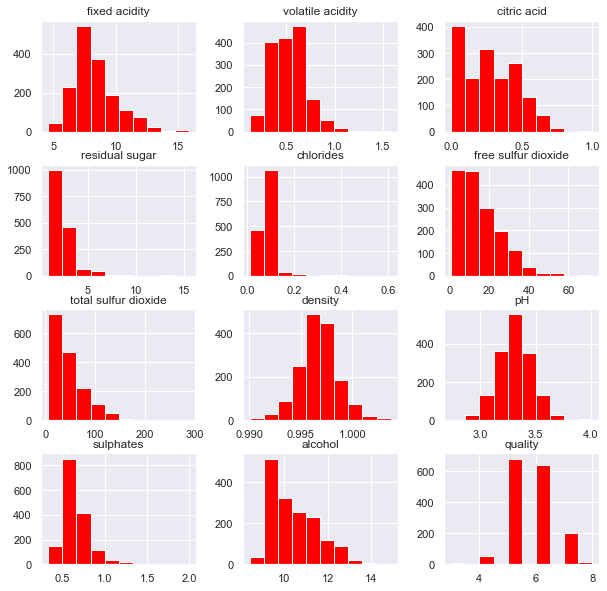

In [64]:
import matplotlib.pyplot as plt

data.hist(figsize=(10,10), color='red')
plt.show()

There is lots of flexibility with matplotlib so let's not get lost in the here; I suggest you review the matplotlib notebook. An important note though is quality is clearly not continuous - there are gaps in the histogram - indicuating that this is a subjective measure, and therefore an observable dependent on all other features in the context of this study.

We can look for general trends of quality against other observables using standard two-axis plots:

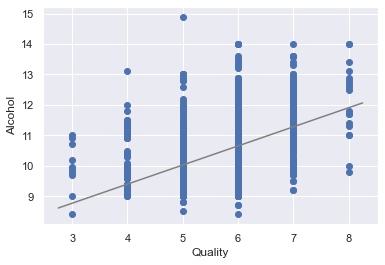

In [65]:
# Plot data
plt.scatter(data['quality'], data['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')

# Plot a line of best fit
import numpy as np
m, c = np.polyfit(data['quality'], data['alcohol'], 1)
x = np.array(plt.gca().get_xlim())
plt.plot(x, m*x + c, color='grey')

plt.show()

So interestingly this tells us that quality improves with alcohol content - read into that as you will! 

Whilst working with producing these graphs, I came across the nice features of seaborn for data analysis. Graphs are easy to produce (compare the simple script below with the matplotlib examples), and lines of best fit for this are slightly more aesthetic as they can include e.g. confidence intervals, here plotted so we are 100% confident the mean of each `quality` value is within the shaded area around the line of best fit:



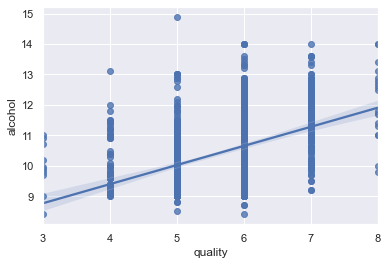

In [66]:
import seaborn as sns

sns.regplot(x="quality", y="alcohol", data=data, ci=100)
plt.show()

However, one of the more powerful tools available from seaborn is to visualise a correlation plot of the data - this will already give us hints on how features are related to each other:

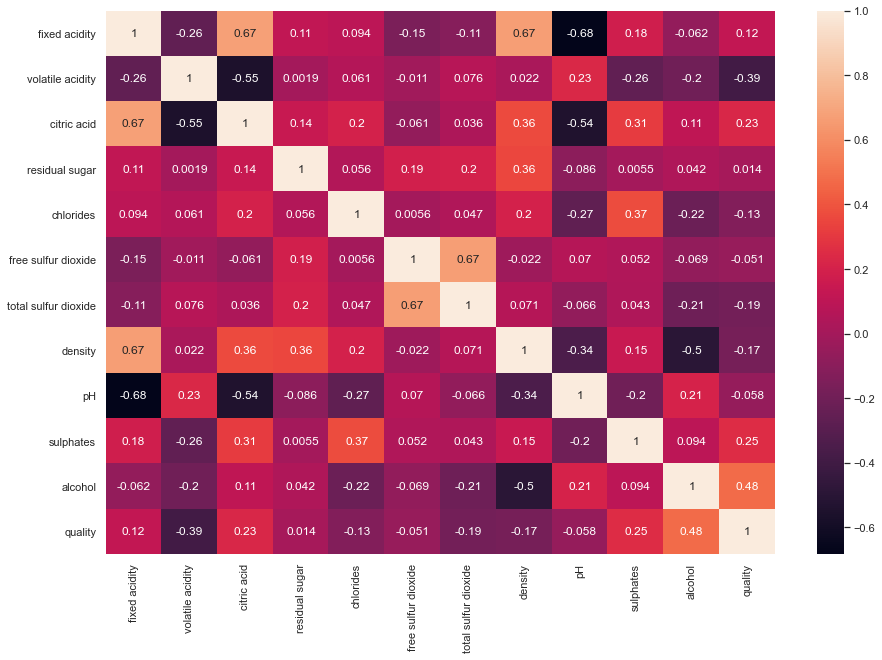

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Creating a ML model

It's great that we can review the data, but actually what we want to do is try to make some predictions.